In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

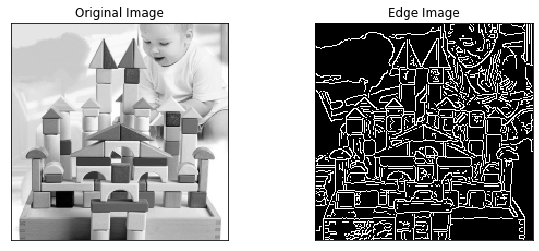

In [2]:
# Read the original image and resize
dummy_image = cv2.imread('Baby.PNG')
dummy_image = cv2.cvtColor(dummy_image, cv2.COLOR_BGR2GRAY)
dummy_image = cv2.resize(dummy_image, (200, 200))

edges = cv2.Canny(dummy_image, 10, 50)
fig = plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(dummy_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [3]:
!pip install opencv-contrib-python
!pip install opencv-python

(Text(0.5, 1.0, 'Random Forest model edge'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

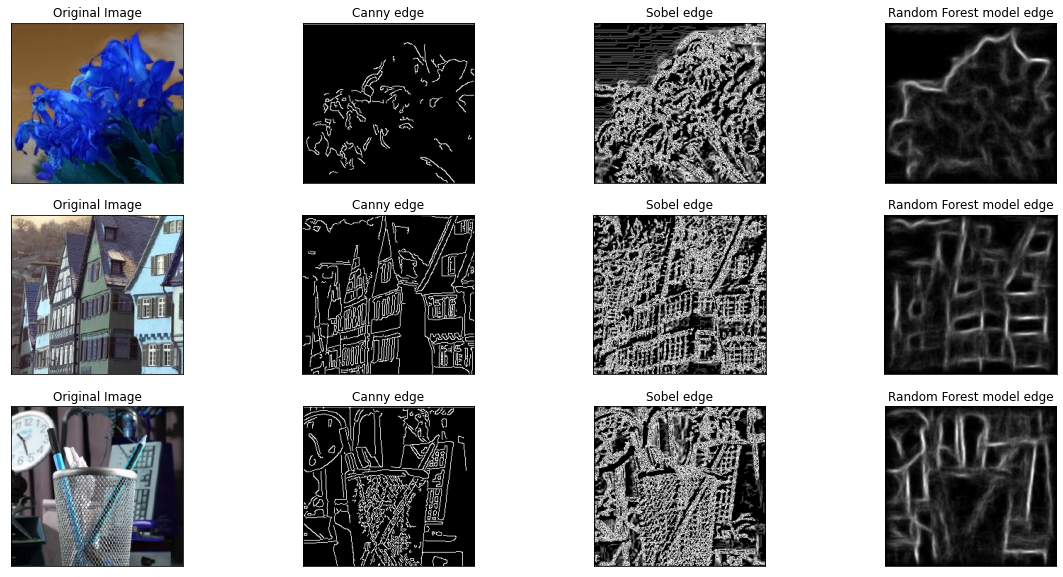

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel_xy(img):
    kernel1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    img_x = cv2.filter2D(img, -1, kernel1)
    kernel2 = cv2.rotate(kernel1, cv2.ROTATE_90_CLOCKWISE)
    img_y = cv2.filter2D(img, -1, kernel2)
    magnitude = np.sqrt((img_x ** 2) + (img_y ** 2))
    magnitude = np.uint8(magnitude)
    return magnitude

img_flower = cv2.imread('Flower.JPG')
img_house = cv2.imread('Houses.JPG')
img_ps = cv2.imread('PenStand.JPG')

gray_flower = cv2.cvtColor(img_flower, cv2.COLOR_BGR2GRAY)
gray_house = cv2.cvtColor(img_house, cv2.COLOR_BGR2GRAY)
gray_ps = cv2.cvtColor(img_ps, cv2.COLOR_BGR2GRAY)

img_flower_rgb = cv2.cvtColor(img_flower, cv2.COLOR_BGR2RGB)
img_house_rgb = cv2.cvtColor(img_house, cv2.COLOR_BGR2RGB)
img_ps_rgb = cv2.cvtColor(img_ps, cv2.COLOR_BGR2RGB)

gray_flower = cv2.GaussianBlur(gray_flower, (5,5), 0)
gray_house = cv2.GaussianBlur(gray_house, (5,5), 0)
gray_ps = cv2.GaussianBlur(gray_ps, (5,5), 0)

canny_edges_flower = cv2.Canny(gray_flower,80,150)
canny_edges_house = cv2.Canny(gray_house,80,150)
canny_edges_pens = cv2.Canny(gray_ps,80,150)

sobel_edges_flower = apply_sobel_xy(gray_flower)
sobel_edges_house = apply_sobel_xy(gray_house)
sobel_edges_pens = apply_sobel_xy(gray_ps)

edge_detection = cv2.ximgproc.createStructuredEdgeDetection('./model.yml')
forest_edges_flower = edge_detection.detectEdges(np.float32(img_flower_rgb) / 255.0)
forest_edges_house = edge_detection.detectEdges(np.float32(img_house_rgb) / 255.0)
forest_edges_pens = edge_detection.detectEdges(np.float32(img_ps_rgb) / 255.0)

fig = plt.figure(figsize=(20, 10))

plt.subplot(3,4,1),plt.imshow(img_flower, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,2),plt.imshow(canny_edges_flower, cmap = 'gray')
plt.title('Canny edge'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,3),plt.imshow(sobel_edges_flower, cmap = 'gray')
plt.title('Sobel edge'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,4),plt.imshow(forest_edges_flower, cmap = 'gray')
plt.title('Random Forest model edge'), plt.xticks([]), plt.yticks([])

plt.subplot(3,4,5),plt.imshow(img_house, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,6),plt.imshow(canny_edges_house, cmap = 'gray')
plt.title('Canny edge'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,7),plt.imshow(sobel_edges_house, cmap = 'gray')
plt.title('Sobel edge'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,8),plt.imshow(forest_edges_house, cmap = 'gray')
plt.title('Random Forest model edge'), plt.xticks([]), plt.yticks([])

plt.subplot(3,4,9),plt.imshow(img_ps, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,10),plt.imshow(canny_edges_pens, cmap = 'gray')
plt.title('Canny edge'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,11),plt.imshow(sobel_edges_pens, cmap = 'gray')
plt.title('Sobel edge'), plt.xticks([]), plt.yticks([])
plt.subplot(3,4,12),plt.imshow(forest_edges_pens, cmap = 'gray')
plt.title('Random Forest model edge'), plt.xticks([]), plt.yticks([])